In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import pandas as pd
import numpy as np
import re as re
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

db = mysql.connector.connect(
    host="localhost",
    user="Soon Woo",
    passwd="root",
    database="hawaiitour"
)

In [213]:
#Accessing database from MySQL Workshop
dbquery1 = pd.read_sql_query("SELECT * FROM hawaiitourcustomers;",db)

In [214]:
#Converting database into dataframe for Python operations
df1 = pd.DataFrame(dbquery1, columns=['Customer type', 'Item', 'Total'])

Text(0, 0.5, '')

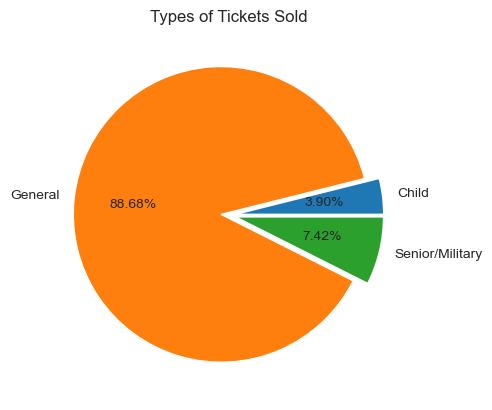

In [215]:
#Pie Chart with largest revenue source, "Road To Hana - From Maui"
pieC = df1[(df1["Item"] == "Road To Hana - From Maui") & (df1["Total"] > 0)]
pieC = pieC.set_index('Customer type')
explode = (0.05, 0.05, 0.05)
pieC = pieC.plot.pie(y='Total', autopct='%.2f%%', explode=explode, legend=False)
plt.title("Types of Tickets Sold")
plt.ylabel('')

Text(0, 0.5, '')

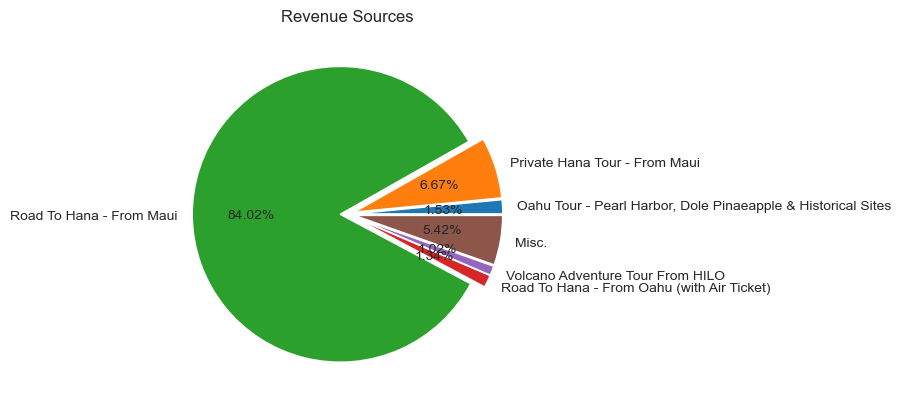

In [216]:
#Pie Chart grouping by revenue sources
pieC2 = df1.groupby('Item').agg({'Total': np.sum})
pieC2 = pieC2['Total'].div(pieC2['Total'].sum())
pieC2 = pieC2.multiply(100)
pieC2 = pieC2.to_frame()
#pieBig are revenue sources (>=1% of total revenue), pieSmall are revenue sources (<1% of total revenue)
pieBig = pieC2[pieC2['Total'] >= 1]
pieSmall = pieC2[pieC2['Total'] < 1]
#Misc. is the sum of all <1% revenue sources
pieSmall = {'Item' : 'Misc.', 'Total' : pieSmall.sum()}
pieSmall = pd.DataFrame(pieSmall)
pieSmall = pieSmall.set_index('Item')
combinedDF = [pieBig, pieSmall]
pieC2 = pd.concat(combinedDF)
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
pieC2 = pieC2.plot.pie(y='Total', autopct='%.2f%%', explode=explode, legend=False)
plt.title("Revenue Sources")
plt.ylabel('')

In [217]:
#Finding the most popular day, week, month, season
dates = pd.read_csv('hawaiitourdates.csv', skiprows=[1])
dates = dates[dates.Total.notnull()]
dates = dates[['Item', 'Availability', 'Total']]
dates = dates[dates["Item"] == "Road To Hana - From Maui"]
#Creating a definition to find dates
def find_dates(dt):
    #format: mm/dd/yy
    result = re.findall(r'\b\d?\d/\d?\d/\d+', dt)
    return result
dates['Availability'] = dates['Availability'].apply(lambda dt: find_dates(dt))
dates['Availability'] = dates['Availability'].str[0]
#Finding weekday belonging to date
dates['Weekday'] = pd.to_datetime(dates['Availability']).dt.day_name()
#Finding month belonging to date
dates['Month'] = pd.to_datetime(dates['Availability']).dt.month_name()
dates['Month'] = dates['Month'].map({'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr', 'May': 'May', 'June': 'June', 'July': 'July', 'August': 'Aug', 'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'})
#Finding season belonging to month
dates['Season'] = dates['Month'].map({'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring', 'June': 'Summer', 'July': 'Summer', 'Aug': 'Summer', 'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'})
dates

,Item,Availability,Total,Weekday,Month,Season
2,Road To Hana - From Maui,9/3/21,$218.74,Friday,Sep,Fall
3,Road To Hana - From Maui,9/4/21,"$1,312.44",Saturday,Sep,Fall
4,Road To Hana - From Maui,9/5/21,"$1,291.61",Sunday,Sep,Fall
5,Road To Hana - From Maui,9/6/21,"$2,406.14",Monday,Sep,Fall
7,Road To Hana - From Maui,9/7/21,"$3,499.84",Tuesday,Sep,Fall
...,...,...,...,...,...,...
668,Road To Hana - From Maui,8/27/22,"$12,860.17",Saturday,Aug,Summer
669,Road To Hana - From Maui,8/28/22,"$12,274.46",Sunday,Aug,Summer
670,Road To Hana - From Maui,8/29/22,"$15,207.64",Monday,Aug,Summer
671,Road To Hana - From Maui,8/30/22,"$9,634.97",Tuesday,Aug,Summer


Text(0, 0.5, 'Revenue in $1,000s')

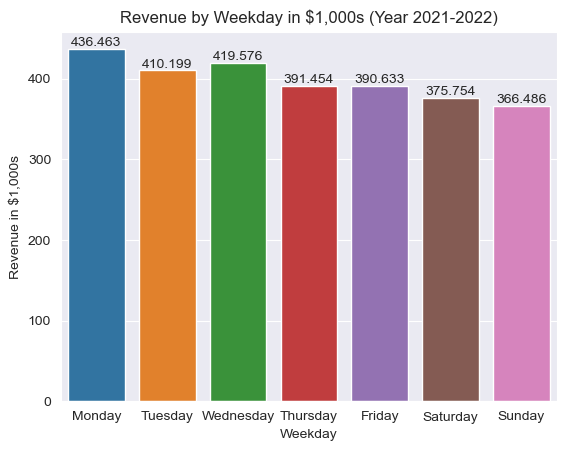

In [218]:
#Bar Chart for Revenue by Weekday
dates[dates.columns[2]] = dates[dates.columns[2]].replace('[\$,]', '', regex=True).astype(float)
datesWeekday = dates.groupby('Weekday').sum().reset_index()
weekdays = pd.CategoricalDtype(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
datesWeekday['Weekday'] = datesWeekday['Weekday'].astype(weekdays)
datesWeekday['Total'] = datesWeekday['Total'].div(1000)
ax = sns.barplot(x='Weekday', y='Total', data=datesWeekday,errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Revenue by Weekday in $1,000s (Year 2021-2022)")
plt.ylabel("Revenue in $1,000s")

Text(0, 0.5, 'Revenue in $1,000s')

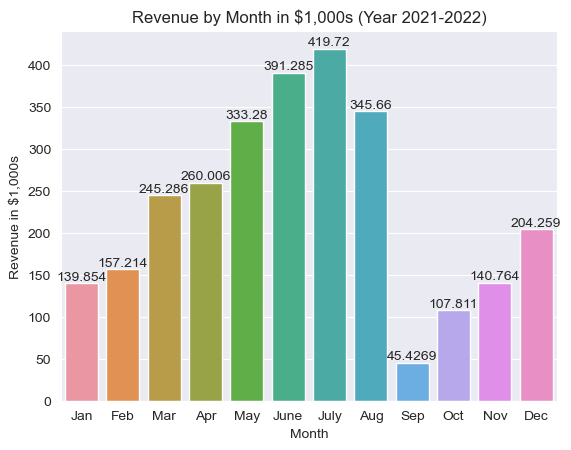

In [219]:
#Bar Chart for Revenue by Month
datesMonth = dates.groupby('Month').sum().reset_index()
months = pd.CategoricalDtype(["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True)
datesMonth['Month'] = datesMonth['Month'].astype(months)
datesMonth['Total'] = datesMonth['Total'].div(1000)
ax = sns.barplot(x='Month', y='Total', data=datesMonth,errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Revenue by Month in $1,000s (Year 2021-2022)")
plt.ylabel("Revenue in $1,000s")

Text(0, 0.5, 'Revenue in $1,000s')

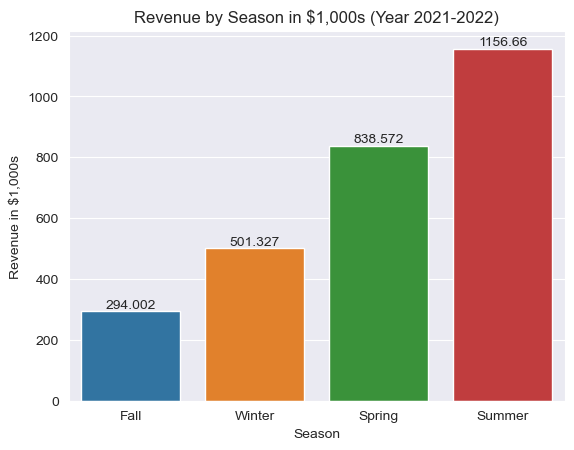

In [220]:
#Bar Chart for Revenue by Season
datesSeason = dates.groupby('Season').sum().reset_index()
seasons = pd.CategoricalDtype(["Fall", "Winter", "Spring", "Summer"], ordered=True)
datesSeason['Season'] = datesSeason['Season'].astype(seasons)
datesSeason['Total'] = datesSeason['Total'].div(1000)
datesSeason = datesSeason.reset_index()
ax = sns.barplot(x='Season', y='Total', data=datesSeason,errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Revenue by Season in $1,000s (Year 2021-2022)")
plt.ylabel("Revenue in $1,000s")

In [221]:
#Acessing Database from MySQL Workshop
dbquery2 = pd.read_sql_query("SELECT Phone FROM hawaiitourphonenumbers;", db)

In [222]:
#Creating Dataframe
phone = pd.DataFrame(dbquery2, columns=['Phone'])

In [223]:
#Regex for finding area codes in US
phone['Phone'] = phone['Phone'].astype(str)
def areacodes(dt):
    #format: (153), (634), (xxx), etc.
    result = re.findall(r'\(\d{3}\)', dt)
    return result
phone['Phone'] = phone['Phone'].apply(lambda dt: areacodes(dt))
phone['Phone'] = phone['Phone'].str[0]
phone = phone[phone.Phone.notnull()]
#Removing Parentheses from Area Code from US phone numbers
def parent(dt):
    #format: 153, 634, xxx, etc.
    result = re.findall(r'\d{3}', dt)
    return result
phone['Phone'] = phone['Phone'].apply(lambda dt: parent(dt))
phone['Phone'] = phone['Phone'].str[0]
phone = phone.rename(columns={'Phone': 'Area Code'})
phone = phone['Area Code'].astype(int)
phone

0       832
1       765
3       206
4       574
5       423
       ... 
5720    917
5721    949
5722    248
5723    760
5724    248
Name: Area Code, Length: 5486, dtype: int32

In [224]:
#List of Cities where Majority Customers Lived Based on Phone Numbers (>50% of the Average approx. 35.72)
cities = pd.read_csv('us-area-code-cities.csv')
areaCity = pd.merge(phone, cities, on="Area Code", how="outer")
areaCity = areaCity.groupby('City').size().reset_index()
areaCity = areaCity.rename(columns={'City': 'NAME', list(areaCity)[1]: 'Customers'})
avg = areaCity['Customers'].mean()
areaCity = areaCity[areaCity['Customers'] > avg]
areaCity

,NAME,Customers
2,Addison,56
4,Affton,46
6,Agoura Hills,70
10,Alameda,80
14,Alexandria,52
...,...,...
1669,Woodridge,56
1673,Worcester,42
1680,Yorba Linda,89
1685,Yucaipa,75


In [225]:
#Database for Population, Demographics, Geometry for Geopandas
us_map = gpd.read_file('USA_Major_Cities.shp')
us_map

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,1,Ammon,city,ID,16,1601990,None,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,POINT (-111.95410 43.47579)
1,2,Blackfoot,city,ID,16,1607840,None,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,POINT (-112.34557 43.19394)
2,3,Boise City,city,ID,16,1608830,State,8,225405,205671,...,21233,2414,5919,50647,2.97,92700,6996,52345,33359,POINT (-116.23011 43.59901)
3,4,Burley,city,ID,16,1611260,None,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,POINT (-113.79329 42.53674)
4,5,Caldwell,city,ID,16,1612250,None,7,53942,46237,...,3113,686,1755,10776,3.51,16323,1428,9699,5196,POINT (-116.68562 43.66163)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3882,Herndon,town,VA,51,5136648,None,6,23993,23292,...,1848,306,525,5357,3.46,7813,341,4558,2914,POINT (-77.38672 38.96993)
3882,3883,Highland Springs,Census Designated Place,VA,51,5137032,None,6,16618,15711,...,1187,206,1323,4157,3.03,6621,513,3795,2313,POINT (-77.32854 37.55172)
3883,3884,Hollins,Census Designated Place,VA,51,5137880,None,6,15033,14673,...,1806,115,413,3800,2.87,6435,385,4361,1689,POINT (-79.95348 37.34338)
3884,3885,Hopewell,city,VA,51,5138424,None,6,22935,22591,...,1963,305,1465,5877,3.00,10121,992,4906,4223,POINT (-77.29837 37.29038)


Text(0.5, 244.12916110142146, 'Grouped By Largest Revenue Source (Road to Hana)')

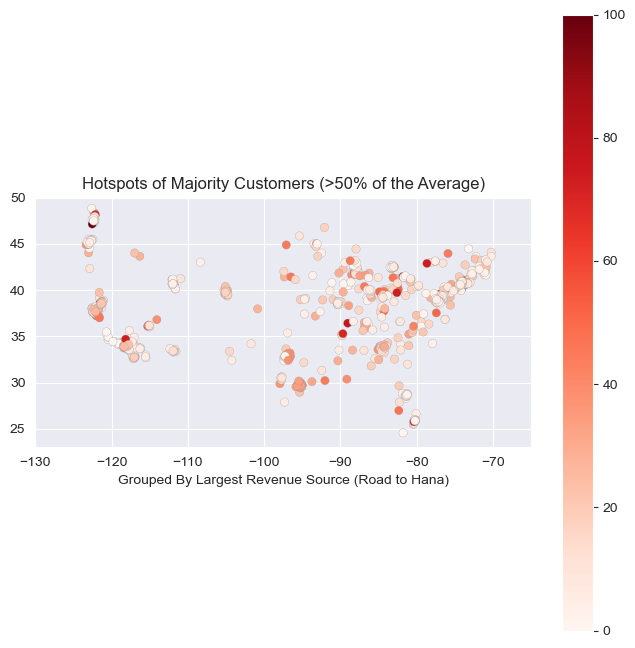

In [226]:
#Plotting Hotspots of Majority Customers using Geopandas
map_and_cities = us_map.merge(areaCity, on='NAME')
fig, ax = plt.subplots(1, figsize=(8, 8))
map_and_cities = map_and_cities.plot(column='Customers', cmap='Reds', linewidth=.2, ax=ax, edgecolor='.6')
bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=100))
bar_info._A = []
cbar = fig.colorbar(bar_info)
ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)
plt.title("Hotspots of Majority Customers (>50% of the Average)")
plt.xlabel("Grouped By Largest Revenue Source (Road to Hana)")

In [227]:
#Top 10 Cities where Largest Revenue Group by Age (Adults), Density of Adults/Population (>60%), and Largest Revenue Source (Road to Hana) all Coincide, Sorted by Number of Customers
map_and_cities = us_map.merge(areaCity, on='NAME')
map_and_cities_Adults = pd.DataFrame(map_and_cities, columns= ['AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64'])
map_and_cities_Adults['Adults'] = map_and_cities_Adults.sum(axis=1)
map_and_cities['Adults'] = map_and_cities_Adults['Adults']
map_and_cities['Adults/Population'] = map_and_cities['Adults'].div(map_and_cities['POPULATION'])
map_and_cities['Adults/Population'] = map_and_cities['Adults/Population'].multiply(100)
map_and_cities = map_and_cities[map_and_cities['Adults/Population'] > 60]
map_and_cities = map_and_cities.sort_values(by='Customers', ascending=False)
map_and_cities = pd.DataFrame(map_and_cities, columns=['NAME', 'ST', 'POPULATION', 'Customers', 'Adults', 'Adults/Population']).head(10)
map_and_cities

,NAME,ST,POPULATION,Customers,Adults,Adults/Population
383,Lakewood,OH,51588,204,35128,68.093355
721,Atlanta,GA,464043,172,281000,60.554733
540,Lancaster,NY,10178,160,6305,61.947337
645,Arlington,VA,227929,155,154336,67.712314
239,Newark,NJ,285064,125,173264,60.780737
783,Brooklyn,OH,10836,117,6584,60.760428
374,Englewood,CO,32546,115,20277,62.302587
461,Campbell,CA,42813,113,25918,60.537687
320,Santa Clara,CA,127159,113,76429,60.105065
794,West Springfield,VA,22643,110,13838,61.113810


In [228]:
#Comparing Revenue, Pre-Covid VS. Post-Covid
#fy = First Year
fy = pd.read_csv('2018-2019.csv', skiprows=[1])
fy = fy[fy.Total.notnull()]
fy = fy[['Item', 'Availability', 'Total']].assign(Year="2018-2019")
fy = fy[fy["Item"] == "Road To Hana - From Maui"]

fy['Availability'] = fy['Availability'].apply(lambda dt: find_dates(dt))
fy['Availability'] = fy['Availability'].str[0]
fy[fy.columns[2]] = fy[fy.columns[2]].replace('[\$,]', '', regex=True).astype(float)
firstyearsum = fy.groupby('Year').sum().reset_index()

In [229]:
#sy = Second Year
sy = pd.read_csv('2019-2020.csv', skiprows=[1])
sy = sy[sy.Total.notnull()]
sy = sy[['Item', 'Availability', 'Total']].assign(Year="2019-2020")
sy = sy[sy["Item"] == "Road To Hana - From Maui"]
sy['Availability'] = sy['Availability'].apply(lambda dt: find_dates(dt))
sy['Availability'] = sy['Availability'].str[0]
sy[sy.columns[2]] = sy[sy.columns[2]].replace('[\$,]', '', regex=True).astype(float)
secondyearsum = sy.groupby('Year').sum().reset_index()

In [230]:
#ty = Third Year
ty = pd.read_csv('2020-2021.csv', skiprows=[1])
ty = ty[ty.Total.notnull()]
ty = ty[['Item', 'Availability', 'Total']].assign(Year="2020-2021")
ty = ty[ty["Item"] == "Road To Hana - From Maui"]
ty['Availability'] = ty['Availability'].apply(lambda dt: find_dates(dt))
ty['Availability'] = ty['Availability'].str[0]
ty[ty.columns[2]] = ty[ty.columns[2]].replace('[\$,]', '', regex=True).astype(float)
thirdyearsum = ty.groupby('Year').sum().reset_index()

In [231]:
#foury = Fourth Year
foury = pd.DataFrame(dates, columns=['Item', 'Availability', 'Total']).assign(Year="2021-2022")
foury = foury[foury["Item"] == "Road To Hana - From Maui"]
fourthyearsum = foury.groupby('Year').sum().reset_index()

In [232]:
#Revenue by Year in Largest Revenue Source - Road to Hana, (Revenue in $1,000s)
combinedYears = [firstyearsum, secondyearsum, thirdyearsum, fourthyearsum]
RevenueYears = pd.concat(combinedYears)
RevenueYears

,Year,Total
0,2018-2019,725220.05
0,2019-2020,467374.28
0,2020-2021,1280151.73
0,2021-2022,2790565.35


Text(0, 0.5, 'Revenue in $1,000s')

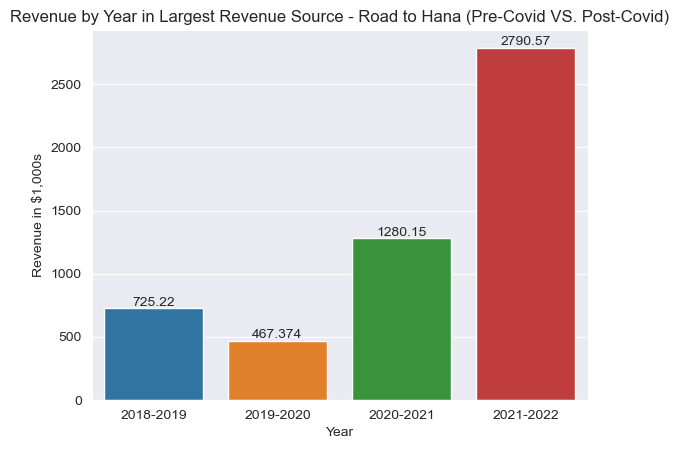

In [233]:
#Bar Chart for Revenue by Year in $1,000s
RevenueYears['Total'] = RevenueYears['Total'].div(1000)
ax = sns.barplot(x='Year', y='Total', data=RevenueYears,errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Revenue by Year in Largest Revenue Source - Road to Hana (Pre-Covid VS. Post-Covid)")
plt.ylabel("Revenue in $1,000s")